In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os 

In [3]:
#getting data sets
files = os.listdir("C:/Users/Efe/Documents/pythonSales")

dfs = pd.DataFrame()
for file in files:
    aa = pd.read_csv("C:/Users/Efe/Documents/pythonSales/" + file)
    dfs = pd.concat([aa, dfs])

#drop null/irrelevant values
dfs = dfs[dfs['Order Date'] != 'Order Date']
dfs = dfs.dropna()

#create city collumn
dfs['City'] = dfs['Purchase Address'].apply(lambda x: x.split(',')[1:])
dfs['City'] = dfs['City'].apply(lambda x: ','.join(x))

#format time collumn and create month collumn
dfs['Order Date'] = pd.to_datetime(dfs['Order Date'])
dfs['Month'] = dfs['Order Date'].dt.month
dfs['Hour'] = dfs['Order Date'].dt.hour
dfs['Day'] = dfs['Order Date'].dt.day

#sales
dfs['Quantity Ordered'] = pd.to_numeric(dfs['Quantity Ordered'])
dfs['Price Each'] = pd.to_numeric(dfs['Price Each'])
dfs['Sales'] = dfs['Quantity Ordered'] * dfs['Price Each']

#change quantity ordered  and hour to int incase its float
dfs['Quantity Ordered'] = dfs['Quantity Ordered'].astype('int')
dfs['Hour'] = dfs['Hour'].astype('int')




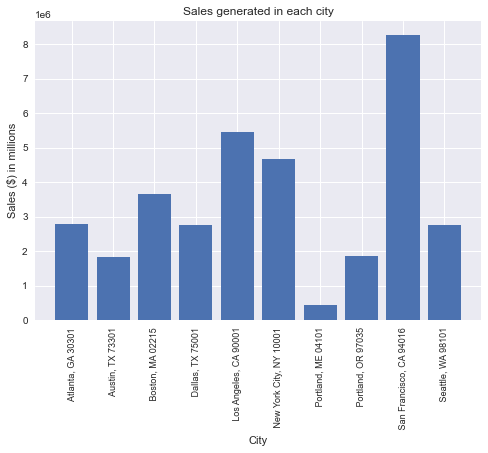

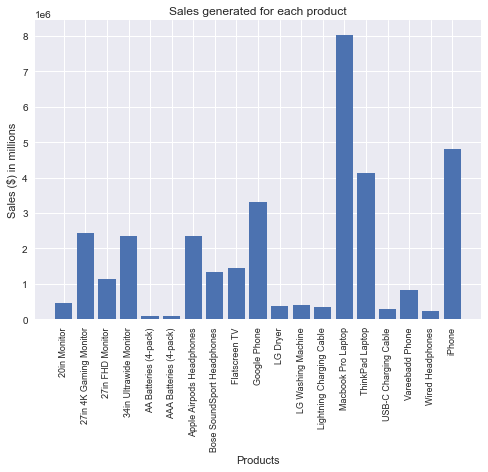

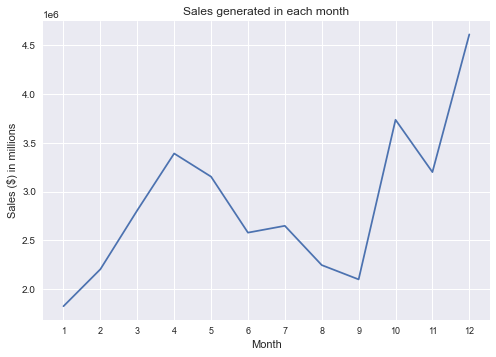

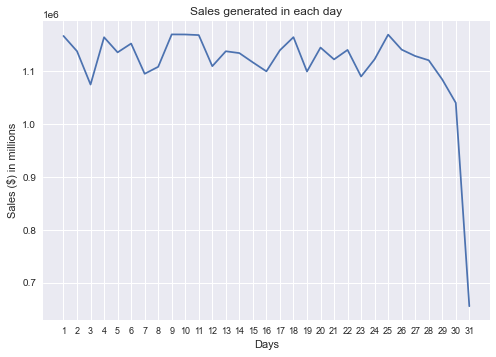

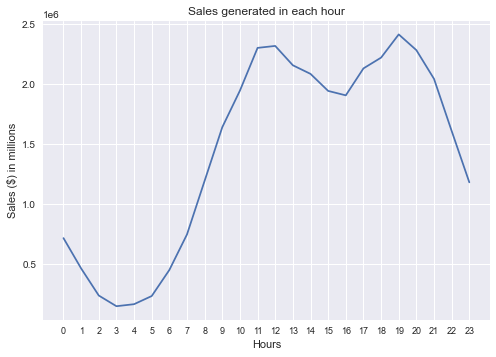

In [12]:
#aggregating data

#y-axis
mon = dfs.groupby('Month').sum()
da = dfs.groupby('Day').sum()
hr = dfs.groupby('Hour').sum()
cty = dfs.groupby('City').sum()
pro = dfs.groupby('Product').sum()

#x-axis
unique_months = dfs['Month'].unique()
unique_months.sort()
unique_days = dfs['Day'].unique()
unique_days.sort()
unique_hours = dfs['Hour'].unique()
unique_hours.sort()
unique_city = dfs['City'].unique()
unique_city.sort()
unique_product = dfs['Product'].unique()
unique_product.sort()

#the sales analysis(sales):

#Sales by city
def city(unique_city, cty):
    plt.bar(unique_city, cty['Sales'])
    plt.xticks(unique_city, rotation='vertical',size=9)
    plt.title('Sales generated in each city')
    plt.ylabel('Sales ($) in millions')
    plt.xlabel('City')
    plt.style.use('seaborn')
    return plt.show()

#Sales by product
def product(unique_product, pro):
    plt.bar(unique_product, pro['Sales'])
    plt.xticks(unique_product, rotation='vertical',size=9)
    plt.title('Sales generated for each product')
    plt.ylabel('Sales ($) in millions')
    plt.xlabel('Products')
    plt.style.use('seaborn')
    return plt.show()

#sales by month
def month(unique_months, mon):
    plt.plot(unique_months, mon['Sales'])
    plt.xticks(unique_months, size=9)
    plt.title('Sales generated in each month')
    plt.ylabel('Sales ($) in millions')
    plt.xlabel('Month')
    plt.style.use('seaborn')
    return plt.show()


#sales by day da
def day(unique_days, da):
    plt.plot(unique_days, da['Sales'])
    plt.xticks(unique_days, size=9)
    plt.title('Sales generated in each day')
    plt.ylabel('Sales ($) in millions')
    plt.xlabel('Days')
    plt.style.use('seaborn')
    return plt.show()


#Sales by hour hr
def hour(unique_hours, hr):
    plt.plot(unique_hours, hr['Sales'])
    plt.xticks(unique_hours, size=9)
    plt.title('Sales generated in each hour')
    plt.ylabel('Sales ($) in millions')
    plt.xlabel('Hours')
    plt.style.use('seaborn')
    return plt.show()



city(unique_city, cty)
product(unique_product, pro)
month(unique_months, mon)
day(unique_days, da)
hour(unique_hours, hr)

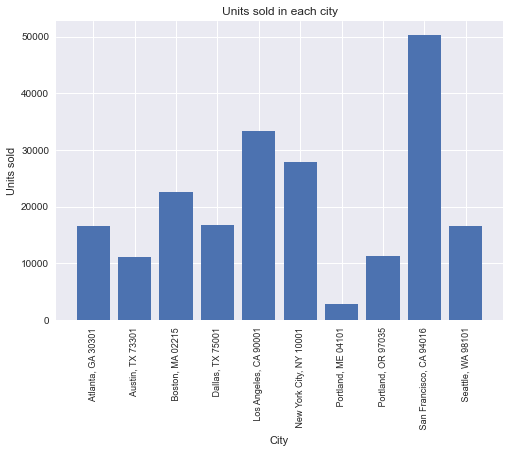

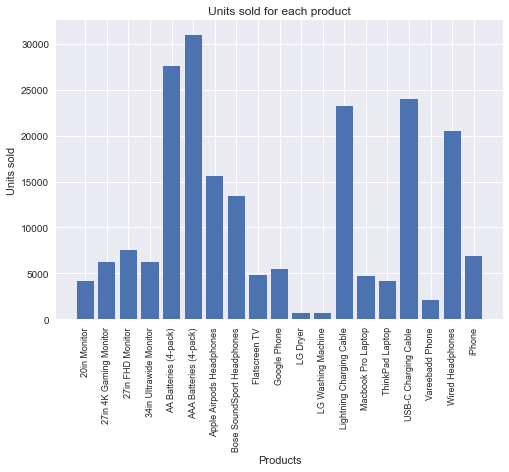

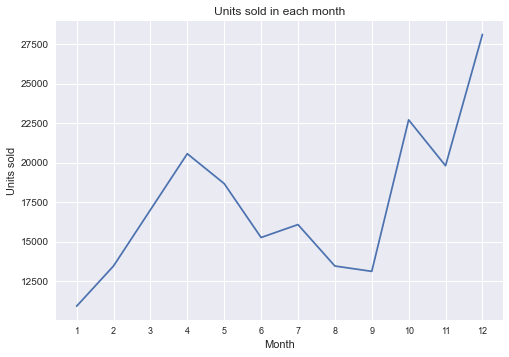

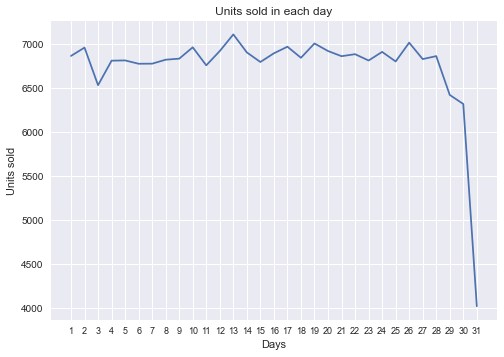

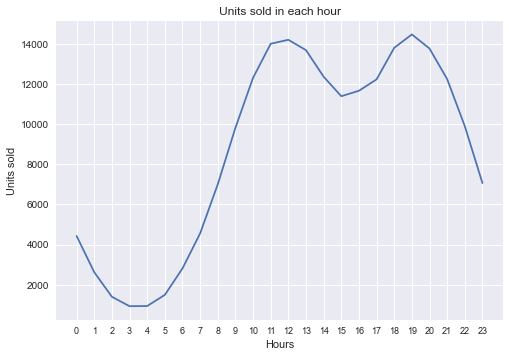

In [14]:
#the sales analysis(units sold):

#units sold by city
def ucity(unique_city, cty):
    plt.bar(unique_city, cty['Quantity Ordered'])
    plt.xticks(unique_city, rotation='vertical',size=9)
    plt.title('Units sold in each city')
    plt.ylabel('Units sold')
    plt.xlabel('City')
    plt.style.use('seaborn')
    return plt.show()

#units sold by product
def uproduct(unique_product, pro):
    plt.bar(unique_product, pro['Quantity Ordered'])
    plt.xticks(unique_product, rotation='vertical',size=9)
    plt.title('Units sold for each product')
    plt.ylabel('Units sold')
    plt.xlabel('Products')
    plt.style.use('seaborn')
    return plt.show()

#units sold by month
def umonth(unique_months, mon):
    plt.plot(unique_months, mon['Quantity Ordered'])
    plt.xticks(unique_months, size=9)
    plt.title('Units sold in each month')
    plt.ylabel('Units sold')
    plt.xlabel('Month')
    plt.style.use('seaborn')
    return plt.show()


#units sold by day da
def uday(unique_days, da):
    plt.plot(unique_days, da['Quantity Ordered'])
    plt.xticks(unique_days, size=9)
    plt.title('Units sold in each day')
    plt.ylabel('Units sold')
    plt.xlabel('Days')
    plt.style.use('seaborn')
    return plt.show()


#units sold by hour hr
def uhour(unique_hours, hr):
    plt.plot(unique_hours, hr['Quantity Ordered'])
    plt.xticks(unique_hours, size=9)
    plt.title('Units sold in each hour')
    plt.ylabel('Units sold')
    plt.xlabel('Hours')
    plt.style.use('seaborn')
    return plt.show()



ucity(unique_city, cty)
uproduct(unique_product, pro)
umonth(unique_months, mon)
uday(unique_days, da)
uhour(unique_hours, hr)